In [1]:
import numpy as np 
from PIL import Image
from matplotlib import pyplot as plt

In [13]:
A = np.array(Image.open('trikoupi6.png'))

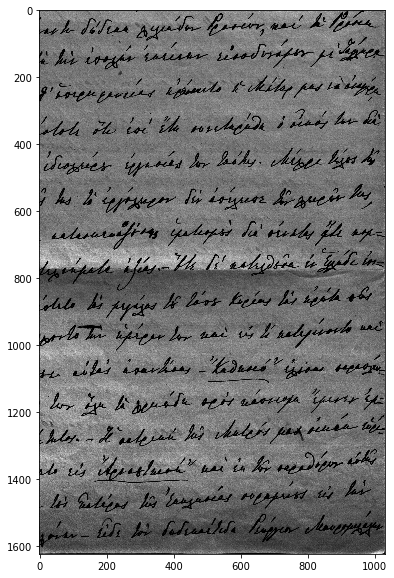

In [14]:
fig = plt.figure(figsize=(10,10))
plt.imshow(A, cmap='gray')
plt.show()

In [15]:
def katwfliwsh_eikonas(image, threshold):
    res = np.zeros_like(image)
    res[image < threshold] = 0
    res[image >=threshold] = 255
    return( np.uint8(res) )

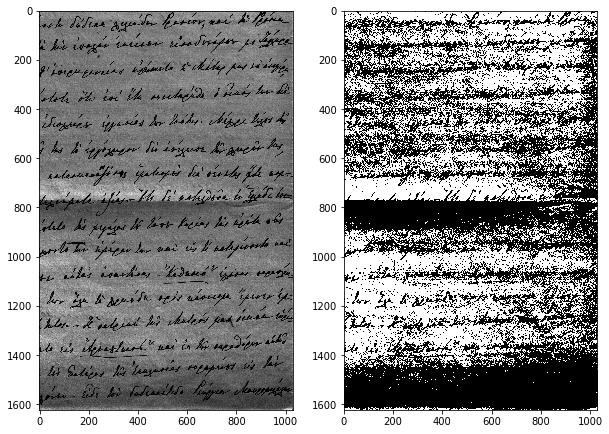

In [24]:
A_katwfliwmeno = katwfliwsh_eikonas(A, 120)
fig = plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(A_katwfliwmeno, cmap='gray')
plt.show()

In [54]:
# Υπολογισμός αντικειμενικής συνάρτησης για κατώφλι k
k = 120
pixels_tmima1 = A[A < k]
pixels_tmima2 = A[A >=k]
print('Για το τμήμα 1 έχω {} pixels, και οι εντάσεις τους είναι {}'.format(len(pixels_tmima1), pixels_tmima1))
print('Για το τμήμα 2 έχω {} pixels, και οι εντάσεις τους είναι {}'.format(len(pixels_tmima2), pixels_tmima2))
# Θα υπολογίσω μέσες τιμές για το κάθε τμήμα
mu1 = np.mean(pixels_tmima1)
mu2 = np.mean(pixels_tmima2)
mu_synoliko = np.mean(A.flatten())
print('Μέση τιμή εντάσεων για τμήμα 1 και 2 αντίστοιχα -- {} , {}'.format(mu1, mu2))
print('Μέση τιμή όλων των εντάσεων -- {}'.format(mu_synoliko))
pi1 = len(pixels_tmima1) / (len(pixels_tmima1) + len(pixels_tmima2))
pi2 = len(pixels_tmima2) / (len(pixels_tmima1) + len(pixels_tmima2))
print('Πιθανότητες π1, π2 -- {} , {}'.format(pi1, pi2))
antikeimeniki_synartisi = pi1 * (mu1 - mu_synoliko)**2 + pi2 * (mu2 - mu_synoliko)**2
print('Τιμή αντικειμενικής συνάρτησης για κατώφλι {}: {}'.format(k, antikeimeniki_synartisi))

Για το τμήμα 1 έχω 862460 pixels, και οι εντάσεις τους είναι [117 117 108 ...   0   1   2]
Για το τμήμα 2 έχω 810853 pixels, και οι εντάσεις τους είναι [120 127 139 ... 120 120 121]
Μέση τιμή εντάσεων για τμήμα 1 και 2 αντίστοιχα -- 83.75017044268719 , 134.2461568249732
Μέση τιμή όλων των εντάσεων -- 108.21948493796438
Πιθανότητες π1, π2 -- 0.5154206057085554 , 0.4845793942914446
Τιμή αντικειμενικής συνάρτησης για κατώφλι 120: 636.8548196686086


In [58]:
def ypologise_antikeimeniki_otsu(A, k):
    pixels_tmima1 = A[A < k]
    pixels_tmima2 = A[A >=k]
    mu1 = np.mean(pixels_tmima1)
    mu2 = np.mean(pixels_tmima2)
    mu_synoliko = np.mean(A.flatten())
    pi1 = len(pixels_tmima1) / (len(pixels_tmima1) + len(pixels_tmima2))
    pi2 = len(pixels_tmima2) / (len(pixels_tmima1) + len(pixels_tmima2))
    antikeimeniki_synartisi = pi1 * (mu1 - mu_synoliko)**2 + pi2 * (mu2 - mu_synoliko)**2
    return(antikeimeniki_synartisi)

In [60]:
for katwfli in range(1, 256, 10):
    obj_otsu = ypologise_antikeimeniki_otsu(A, katwfli)
    print('Τιμή αντικειμενικής συνάρτησης Otsu για το κατώφλι {} είναι: {}'.format(katwfli, obj_otsu))

Τιμή αντικειμενικής συνάρτησης Otsu για το κατώφλι 1 είναι: 161.65125741768497
Τιμή αντικειμενικής συνάρτησης Otsu για το κατώφλι 11 είναι: 804.9427308420156
Τιμή αντικειμενικής συνάρτησης Otsu για το κατώφλι 21 είναι: 879.6507205366676
Τιμή αντικειμενικής συνάρτησης Otsu για το κατώφλι 31 είναι: 924.1553347147183
Τιμή αντικειμενικής συνάρτησης Otsu για το κατώφλι 41 είναι: 946.3118913657516
Τιμή αντικειμενικής συνάρτησης Otsu για το κατώφλι 51 είναι: 967.4776732231439
Τιμή αντικειμενικής συνάρτησης Otsu για το κατώφλι 61 είναι: 984.8704398001706
Τιμή αντικειμενικής συνάρτησης Otsu για το κατώφλι 71 είναι: 998.2430424279241
Τιμή αντικειμενικής συνάρτησης Otsu για το κατώφλι 81 είναι: 991.8976437721883
Τιμή αντικειμενικής συνάρτησης Otsu για το κατώφλι 91 είναι: 969.5975147757534
Τιμή αντικειμενικής συνάρτησης Otsu για το κατώφλι 101 είναι: 899.2790340604593
Τιμή αντικειμενικής συνάρτησης Otsu για το κατώφλι 111 είναι: 773.3463026153582
Τιμή αντικειμενικής συνάρτησης Otsu για το κατώφλι

In [64]:
# Κατωφλίωση Otsu
def otsu_thresholder(image):
    kalytero_katwfli = 0
    kalyterh_timi = 0
    for i in range(1, 256):
        obj_otsu = ypologise_antikeimeniki_otsu(A, i)
        if(obj_otsu > kalyterh_timi):
            kalytero_katwfli = i 
            kalyterh_timi = obj_otsu
    res = katwfliwsh_eikonas(image, kalytero_katwfli)
    print(kalytero_katwfli, kalyterh_timi)
    return(res)

71 998.2430424279241


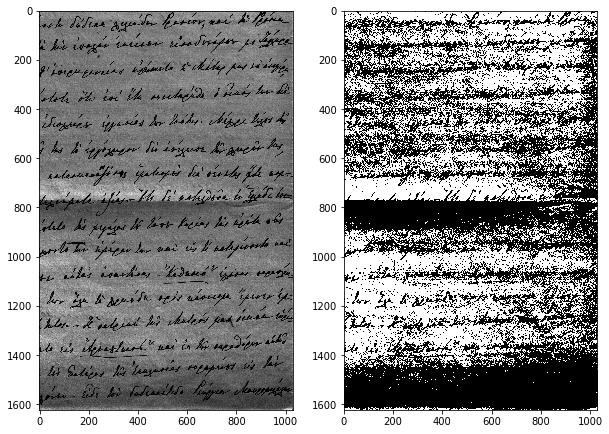

In [65]:
A_otsu = otsu_thresholder(A)
fig = plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(A_otsu, cmap='gray')
plt.show()